# Getting started

Here we will show a very basic example how to use grandPy to perform kinetic modeling. For more vignettes explore the [vignettes folder](
../vignettes/).

We will use data from [[1]](https://www.nature.com/articles/s41586-021-03610-3). These are SLAM-seq data from multiple time points (1h, 2h, 3h, 4h) after infecting Calu-3 cells with SARS-CoV-2 (or mock as control).

First we load the grandPy package and read the GRAND-SLAM that is part of the grandPy package:

In [1]:
from pyexpat.errors import messages

from Py.load import * # ANPASSEN
from Py.plot import * # ANPASSEN

warnings.filterwarnings("ignore", category=UserWarning)

sars = read_grand("../data/sars_R.tsv", design=("Condition", "dur.4sU", "Replicate"))
sars = sars.normalize()
print(sars)

Detected dense format -> using dense reader
GrandPy:
Read from sars_R
1045 genes, 12 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count', 'norm']
Available analyses: []
Available plots: {}
Default data slot: norm



C:\Users\User\PycharmProjects\grandpy\Py\utils.py:140: UserWarning: 1 Duplicate gene symbols found: MATR3 (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).
  warnings.warn(f"{len(duplicates_list)} Duplicate gene symbols found: {', '.join(duplicates_list[:5])} (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).")


The GRAND-SLAM output normally contains any gene with at least 1 read, i.e. > 30k genes. The data set that is part of grandPy has been prefiltered and only consists of 1045 genes. For a complete workflow including filter see the [full vignette](vignette_02_kinetic_modeling.ipynb). Note that we also normalized the read counts (by using size factors), which added an additional data "slot".

<span style="color:red"> We can start by creating a plot showing the kinetics for a gene: ...</span>

Fitting SARS: 100%|██████████| 1/1 [00:00<00:00, 377.90it/s]


     time_numeric  Expression Type condition
200      0.000000    0.000000  new      Mock
201      0.020101    7.184576  new      Mock
202      0.040201   14.328927  new      Mock
203      0.060302   21.433280  new      Mock
204      0.080402   28.497858  new      Mock
..            ...         ...  ...       ...
395      3.919598  853.878806  new      Mock
396      3.939698  856.282787  new      Mock
397      3.959799  858.673309  new      Mock
398      3.979899  861.050448  new      Mock
399      4.000000  863.414277  new      Mock

[200 rows x 4 columns]
     time_numeric   Expression Type condition
0        0.000000  1283.262318  old      Mock
1        0.020101  1276.077742  old      Mock
2        0.040201  1268.933391  old      Mock
3        0.060302  1261.829038  old      Mock
4        0.080402  1254.764461  old      Mock
..            ...          ...  ...       ...
195      3.919598   429.383512  old      Mock
196      3.939698   426.979531  old      Mock
197      3.959799   42

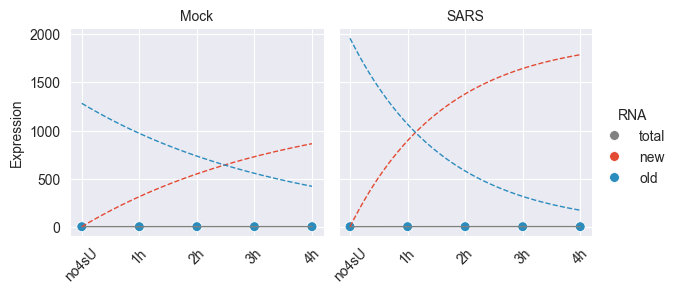

In [2]:
plot_gene_progressive_timecourse(data=sars, gene="SRSF6", slot="ntr", time="duration.4sU.original", steady_state={"Mock": True, "SARS": False}, exact_tics=True, size=50)
# debug print

<span style="color:red">Note that this automatically fit the kinetic model for this gene, separately for the two conditions. Modeling used the default data slot, which are the size-factor normalized values, as indicated above. By using the `steady.state` parameter, we defined the mock infected control samples to be in steady state, whereas the virus infected samples should not be assumed to be in steady state. </span>

<span style="color:red"> We now fit the kinetic model for all genes: </span>

In [3]:
sars = sars.fit_kinetics(slot="norm", time=sars.coldata["duration.4sU"].values, return_fields=["Synthesis","Degradation","Half-life"])

Fitting SARS: 100%|██████████| 1045/1045 [00:02<00:00, 450.58it/s]


Modeling results are stored in two “analysis tables”:

In [4]:
print(sars.analyses)

['kinetics_Mock', 'kinetics_SARS']


We can retrieve this table (for more information, see the [data handling vignette](vignette_04_working_with_data_matrices_and_analysis_results):

In [7]:
sars.get_analysis_table().head()

,Symbol,Gene,Length,Type,Mock_Synthesis,Mock_Degradation,Mock_Half-life,SARS_Synthesis,SARS_Degradation,SARS_Half-life
Symbol,,,,,,,,,,
UHMK1,UHMK1,ENSG00000152332,8478,Cellular,175.303203,0.092302,7.509571,312.386838,0.246338,2.813804
ATF3,ATF3,ENSG00000162772,2103,Cellular,34.018585,0.734623,0.943541,484.399168,0.743419,0.932378
PABPC4,PABPC4,ENSG00000090621,3592,Cellular,213.387547,0.106087,6.533790,525.268077,0.294881,2.350600
ROR1,ROR1,ENSG00000185483,5832,Cellular,193.670366,0.194885,3.556701,444.013524,0.409719,1.691764
ZC3H11A,ZC3H11A,ENSG00000058673,11825,Cellular,251.705725,0.291714,2.376121,694.366405,0.444680,1.558753


We can also easily plot the RNA half-lives of mock infected cells against virus infected cells:

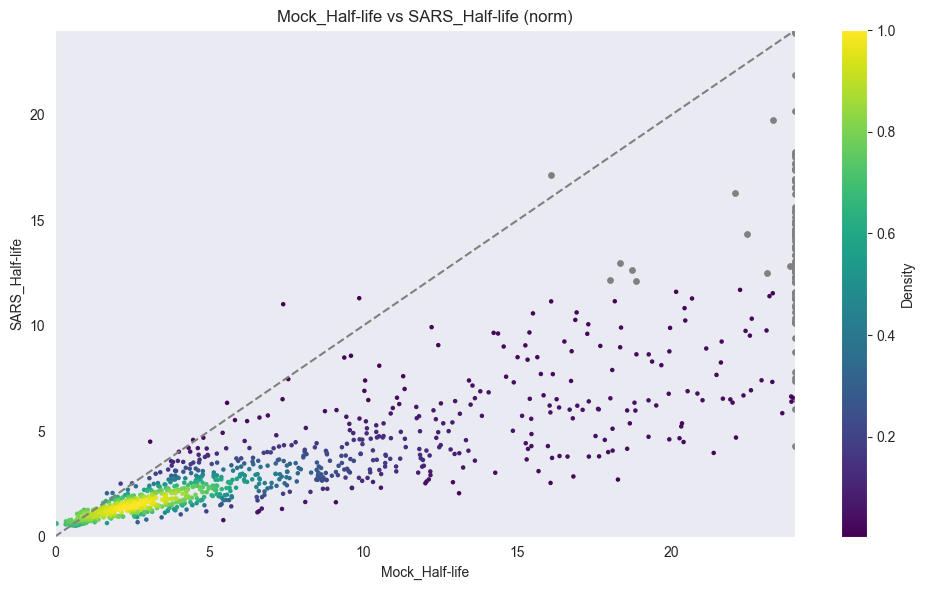

In [6]:
plot_scatter(sars, x="Mock_Half-life", y="SARS_Half-life", limit=(0,24), diagonal=True)